![alt text](../../img/MIoT_ML.png "MIoT_ML")

# Unidad 05 Desarrollo de modelos de redes neuronales

* En esta práctica, exploraremos el como crear y ejecutar modelos de redes neuronales para la clasificación de diferentes problemas. El archivo está formado por dos secciones principales:

    - La primera enseña un ejemplo completo de diseño e implementación de red neuronal, a fin de tener un punto de partida sólido.
    - La segunda propone la creación de una red por vuestra parte, con un par de apartados para su desarrollo y posterior razonamiento.


# Referencias de utilidad

1. [API scikit-learn ](https://scikit-learn.org/stable/api/index.html)
2. [APIT matplotlib](https://matplotlib.org/stable/api/index.html)
3. [Guía extensiva sobre desarrollo de RRNN en sklearn](https://stackabuse.com/introduction-to-neural-networks-with-scikit-learn/)



## 1. Modelo de ejemplo

### 1.1. IRIS dataset 



* El <a href=https://en.wikipedia.org/wiki/Iris_flower_data_set>IRIS</a> es uno de los datasets más conocidos y estudiados. Se compone de __3 clases__ de flores iris: Versicolor, Virginica y Setosa. Posee un total de __150 instancias__, cada una con __4 características__.

* A continuación, se presenta una gráfica de las diferentes características del dataset combinadas entre sí, a fin de ver como los ejemplos se ordenan en cada una:

![image.png](https://upload.wikimedia.org/wikipedia/commons/thumb/5/56/Iris_dataset_scatterplot.svg/1024px-Iris_dataset_scatterplot.svg.png)


* Podemos importar este y muchos otros datasets mediante sklearn de la siguiente manera:

In [125]:
#Accedemos a la librería de datasets que ofrece sklearn
from sklearn.datasets import load_iris

iris = load_iris()
X, y = iris.data, iris.target
print(f"Número de instancias y características {X.shape}. Total de clases: {len(set(y))}")


Número de instancias y características (150, 4). Total de clases: 3


* Una vez tenemos lo datos, podemos graficarlos nosotros mismos usando matplotlib. Si partimos de la longitud de sépalo y la de sépalo, por ejemplo:

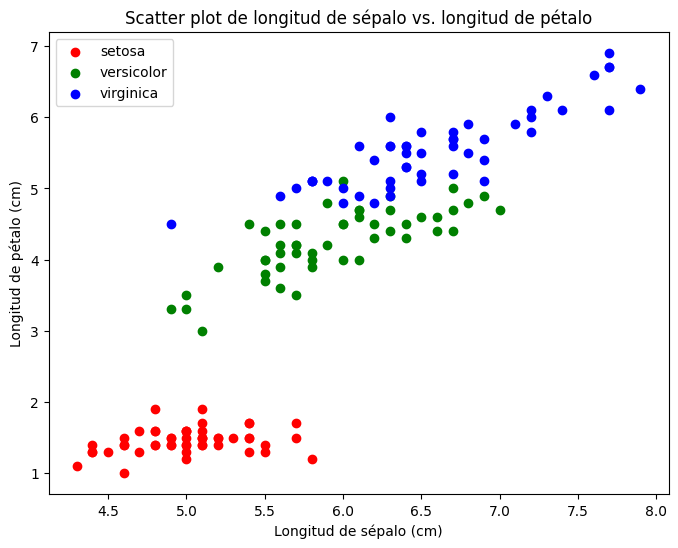

In [4]:

import matplotlib.pyplot as plt

# Definimos los nombres de las clases y los colores para cada una
class_names = iris.target_names
colors = ['red', 'green', 'blue']

# Creamos un gráfico de dispersión para longitud de sépalo vs longitud de pétalo
plt.figure(figsize=(8, 6))
for i, class_name in enumerate(class_names):
    plt.scatter(X[y == i, 0], X[y == i, 2], label=class_name, color=colors[i])

plt.xlabel('Longitud de sépalo (cm)')
plt.ylabel('Longitud de pétalo (cm)')
plt.title('Scatter plot de longitud de sépalo vs. longitud de pétalo')
plt.legend()
plt.show()

### 1.2 Desarrollo 

* Ahora que ya tenemos los datos, podemos empezar con el desarrollo del modelo. Primero, tendremos que disponer los datos de forma manejable:

In [79]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


# Dividimos los datos en conjuntos de entrenamiento y prueba.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# Escalamos los datos, haciendo que su media sea 0 y su desviación estandar 1. 
#Por lo genral esto ayuda a obtener mejores resultados.

print(f"Datos pre-escalado\n: {X_train[0:2]}")

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print(f"\n\nDatos post-escalado\n: {X_train[0:2]}")

Datos pre-escalado
: [[4.6 3.6 1.  0.2]
 [5.7 4.4 1.5 0.4]]


Datos post-escalado
: [[-1.47393679  1.20365799 -1.56253475 -1.31260282]
 [-0.13307079  2.99237573 -1.27600637 -1.04563275]]


* Pasemos ahora a las etiquetas. Si hacemos print de cualquiera de ellas, observamos que estas tienen un valor entero que va del 0 al 2. Cada una de las 3 clases está representada por estos números.

In [20]:
print(f"Valores etiquetas conjunto entrenamiento: {y_train[0:9]}")
print(f"Valores etiquetas conjunto test: {y_test[0:9]}")

Valores etiquetas conjunto entrenamiento: [0 0 1 0 0 2 1 0 0]
Valores etiquetas conjunto test: [1 0 2 1 1 0 1 2 1]


* Aunque sklearn permite este tipo de entradas, suele ser una buena práctica hacer One Hot Encoding, ya que de esta manera nos aseguramos que cualquier modelo sea capaz de trabajar con ellas.

In [80]:
import numpy as np
from sklearn.preprocessing import OneHotEncoder


print(f"Etiquetas originales entrenamiento:\n {y_train[0:5]}\n")
print(f"Etiquetas originales test:\n {y_test[0:5]}")

encoder = OneHotEncoder()

# Aplicamos one-hot encoding a las etiquetas de entrenamiento
y_train = encoder.fit_transform(y_train.reshape(-1, 1)).toarray()

# Aplicamos one-hot encoding a las etiquetas de prueba
y_test = encoder.transform(y_test.reshape(-1, 1)).toarray()

# Mostrar los resultados
print(f"\n\nEtiquetas one-hot entrenamiento:\n {y_train[0:5]}")
print(f"\n\nEtiquetas one-hot entrenamiento:\n {y_test[0:5]}")

Etiquetas originales entrenamiento:
 [0 0 1 0 0]

Etiquetas originales test:
 [1 0 2 1 1]


Etiquetas one-hot entrenamiento:
 [[1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


Etiquetas one-hot entrenamiento:
 [[0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]]


* Ya tenemos todos los datos en la forma que necesitamos. Ahora podemos pasar al desarrollo de la red neuronal en sí:

In [115]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# Creamos el clasificador MLP (Multi-Layer Perceptron). Dentro del mismo, es posible modificar una gran 
#cantidad de características (los llamados "hiperparámetros") para así ajustar la red a nuestras necesidades. 
#Algunas de las más importantes son:

clf = MLPClassifier(
    hidden_layer_sizes=(50,25),     # Número de neuronas en las capas ocultas, siendo cada valor una capa
    max_iter=100,                   # Número de iteraciones
    alpha=0.0001,                   # Regularización L2
    learning_rate_init=0.001,       # Tasa de aprendizaje
    early_stopping=True,            # Detener el entrenamiento cuando no mejora
    validation_fraction=0.2,        # Porcentaje de los datos que se emplean en validación
    n_iter_no_change=10,            # Detener si no hay mejora en 10 iteraciones
    random_state=42                 # Estado aleatorio desde el que se empieza
)


# Entrenamos el modelo usando las características y las etiquetas 
clf.fit(X_train, y_train)

# Hacemos que el modelo intente predecir los datos de prueba
y_pred = clf.predict(X_test)

# Comprobamos, partiendo de las anteriores predicciones, la precisión obtenida
accuracy = accuracy_score(y_test_encoded, y_pred)
print(f'Precisión del modelo: {accuracy * 100:.2f}%')


Precisión del modelo: 83.33%


* Es posible obtener la evolución de la función de pérdida para ver como esta mejora conforme se ejecutan iteraciones. A continuación se muestra la del ejemplo ejecutado:

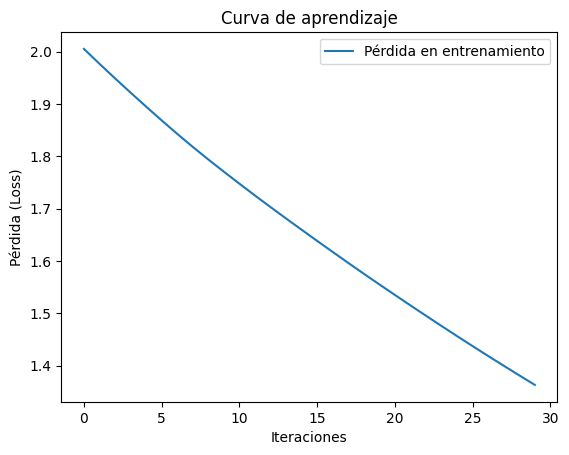

In [116]:

train_loss = clf.loss_curve_

plt.plot(train_loss, label="Pérdida en entrenamiento")
plt.title('Curva de aprendizaje')
plt.xlabel('Iteraciones')
plt.ylabel('Pérdida (Loss)')
plt.legend()
plt.show()

## 2. Vuestro turno

* Para el desarrollo de la práctica, emplearemos el dataset 
<a href=https://www.kaggle.com/datasets/yasserh/wine-quality-dataset>Wine</a>, formado por un conjunto de 178 instancias de muestras de vino.

* Tendréis que completar las siguientes tareas:

1. Desarrolla un modelo de red neuronal que permita realizar una clasificación lo más precisa posible del dataset dado. Seguid los pasos mostrados para el ejemplo resuelto de IRIS, tratando de obtener una precisión final lo más alta posible.

2. Razona acerca del valor de precisión final obtenido:
    - ¿Puede considerarse bueno para el problema dado?
    - En caso de ser bueno, ¿es posible asegurar de alguna forma que este no sea producto del __overfitting__?
    - ¿Que hiperparámetros podríais modificar para intentar mejorarlo?
    - ¿Sería viable aplicar alguna técnica de regularización para conseguir un mejor nivel de precisión?
<br><br>


3. El dataset dado presenta un número considerable de características para en comparación con sus instancias. Intenta identificar cuales son aquellas que aportan menor cantidad de información (puedes servirte de librerías como [seaborn](https://seaborn.pydata.org/)) y aplica una reducción de la dimensionalidad manual. ¿Se observa algún tipo de mejora al ejecutar de nuevo la red neuronal con el dataset modificado?

In [126]:
from sklearn.datasets import load_wine

# Cargamos el dataset
data = load_wine()

# Accedemos a los datos
X = data.data   
y = data.target

print(f"Número de instancias y características {X.shape}, total de clases: {len(set(y))}")



Número de instancias y características (178, 13), total de clases: 3
